In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from os import listdir
import matplotlib.lines as mlines
import math

In [46]:
subject = 'Tir'
if 'Tir' in subject:
    trial_num = 45
else:
    trial_num = 10
area = 'PFC'

condition1 = np.load(f'/om/user/huidili/wmUpdate/150b50s_decode/spk_dec_condition_data/{subject}/{subject}_s2_{area}_retain_feature_label.npz')['feature']
condition2 = np.load(f'/om/user/huidili/wmUpdate/150b50s_decode/spk_dec_condition_data/{subject}/{subject}_s2_{area}_update_feature_label.npz')['feature']

In [47]:
data_t = np.load('/om/user/huidili/wmUpdate/150b50s_decode/spk_dec_input/061311Tir_spk_rate.npz')
tps = np.mean(data_t['rate_bins'], axis=1)

In [48]:
def t_to_idx(t):
    return int((t-(-2))/0.05)

def pca_t(t_idx, popu_X):
    popu_X_t = popu_X[:,:,t_idx]
    cov = np.cov(popu_X_t.T)
    (U, S, VT) = np.linalg.svd(cov, full_matrices=False)
    explained_var = np.cumsum(S)/np.sum(S)
    Z_t = U[:,:3].T@popu_X_t.T
    return Z_t, explained_var[2]

In [49]:
def pca_2d(Z):
    Z_mean = np.expand_dims(np.mean(Z, axis=1), axis=1)
    Y = Z - Z_mean
    cov = np.cov(Y)
    (U, S, VT) = np.linalg.svd(cov, full_matrices=False)
    explained_var = np.cumsum(S)/np.sum(S)
    y = U[:,:2].T@Y
    return y, U, explained_var[1]
    

In [50]:
popu_X = []
for i in range(0, condition1.shape[0], trial_num):
    popu_X.append(np.expand_dims(np.mean(condition1[i:i+trial_num], axis=0), axis=0))

for i in range(0, condition2.shape[0], trial_num):
    popu_X.append(np.expand_dims(np.mean(condition2[i:i+trial_num], axis=0), axis=0))

popu_X = np.concatenate(popu_X, axis=0)
popu_X_mean = np.expand_dims(np.mean(popu_X, axis=0), axis=0)
popu_X = popu_X - popu_X_mean

In [51]:
var_3d_allt = []
var_2d_r1_allt = []
var_2d_r2_allt = []
cos_allt = []

for i in range(128):
    Z, var_3d = pca_t(i, popu_X)
    var_3d_allt.append(var_3d)
    _, U1, var_2d_r1 = pca_2d(Z[:,:4])
    _, U2, var_2d_r2 = pca_2d(Z[:,4:])
    var_2d_r1_allt.append(var_2d_r1)
    var_2d_r2_allt.append(var_2d_r2)
    normal1 = U1[:,2]
    normal2 = U2[:,2]
    cos = np.dot(normal1, normal2)/(np.linalg.norm(normal1)*np.linalg.norm(normal2))
    cos_allt.append(np.abs(cos))
print(var_3d_allt)

[0.5381819741626901, 0.5428170959456117, 0.5354324094933653, 0.5443724997617271, 0.5460118589903906, 0.552857139352602, 0.5316095479022901, 0.5475901526600696, 0.5110952339546443, 0.5367228342716772, 0.5244313636692453, 0.5243809175056285, 0.5242611427923959, 0.5445959556548924, 0.5354332723676754, 0.5189183313827773, 0.521609613959577, 0.521455561134795, 0.5455233655745031, 0.5361963829662317, 0.5482190270311217, 0.5438021828609575, 0.5365644658271105, 0.5455149518484175, 0.5247549112133355, 0.52447031388747, 0.5302007814035479, 0.5502995651828279, 0.5656291613998171, 0.5268120560754568, 0.5297888228946911, 0.5701710662673946, 0.5539652164184825, 0.571301552831614, 0.5452731845732393, 0.5676225802123981, 0.5684992184206199, 0.5503898708022184, 0.5404542123982627, 0.5236865106672128, 0.549052928566044, 0.5974382603997621, 0.6279188851418048, 0.6013174828024442, 0.5980945637259201, 0.5684092616064262, 0.563086545150284, 0.5696041960819896, 0.5787387707613814, 0.5834700238743894, 0.57092

In [52]:
print(np.mean(var_3d_allt))
print(np.mean(var_2d_r1_allt))
print(np.mean(var_2d_r2_allt))

0.6335950646926196
0.965765534215796
0.9652660310264284


Text(0, 0.5, 'Cosine')

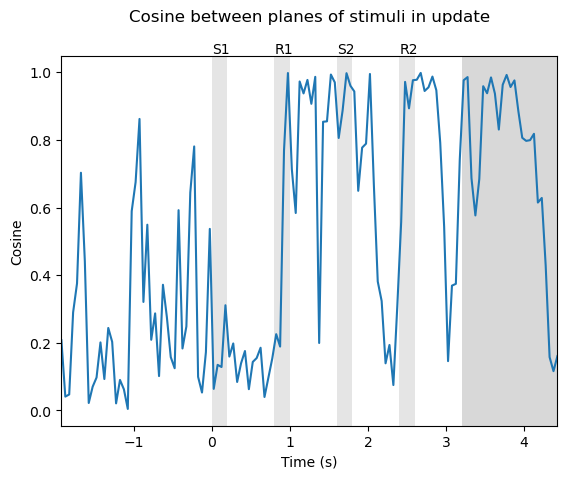

In [53]:
fig, ax = plt.subplots(figsize=(6.4,4.8))

ax.plot(tps, cos_allt)

ax.set_xlim(tps[0], tps[-1])
ax_b, ax_t = ax.get_ylim()
ax_l, ax_r = ax.get_xlim()
ax_vlines = [0, 0.2, 0.8, 1, 1.6, 1.8, 2.4, 2.6]
vline_text = ['S1', 'R1', 'S2', 'R2']
for j in range(0, 8, 2):
    ax.axvspan(ax_vlines[j], ax_vlines[j + 1], alpha=0.2, color='gray', linewidth=0)
ax.axvspan(3.2, ax_r, alpha=0.3, color='gray', linewidth=0)
for j in range(len(vline_text)):
    plt.text(ax_vlines[j * 2], ax_t * 1.02, vline_text[j], verticalalignment='center')


ax.set_title('Cosine between planes of stimuli in update', pad=25)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Cosine')

In [54]:

normal1 = U1[:,2]
normal2 = U2[:,2]
cos = np.dot(normal1, normal2)/(np.linalg.norm(normal1)*np.linalg.norm(normal2))
print(math.degrees(math.acos(cos)))

80.74452044511587
